<a href="https://colab.research.google.com/github/LucasMeirellesS/MiniProjetoAnaliseDados/blob/main/Mini_Projeto_de_An%C3%A1lise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício - Mini Projeto de Análise de Dados

### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços.

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados



### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa?
    
2. Qual foi o faturamento da empresa?
    
3. Qual o % de funcionários que já fechou algum contrato?
    
    
4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?


In [64]:
# Importando bibliotecas e bases de dados
import pandas as pd
import numpy as np

servicos_df = pd.read_excel("/content/BaseServiçosPrestados.xlsx")
clientes_df = pd.read_csv("/content/CadastroClientes.csv", sep=";")
funcionarios_df = pd.read_csv("/content/CadastroFuncionarios.csv", sep=";")

# Observando as bases de dados
display(funcionarios_df.head())
display(clientes_df.head())
display(servicos_df.head())

,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,1,C,Gabriel Mesquita,21910,10955,4382,242,"719,04",Diretor,Operações
1,2,C,João Haddad,5404,2702,"1080,8",154,"574,56",Estagiário,Logística
2,3,C,Amanda Marques Ribeiro,16066,8033,"3213,2",154,"729,12",Estagiário,Administrativo
3,4,C,Guilherme Nunez,21305,"10652,5",4261,220,"524,16",Analista,Administrativo
4,5,C,Adelino Gomes,5098,2549,"1019,6",176,"725,76",Analista,Administrativo


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8


In [65]:
# Verificando os tipos de valores
funcionarios_df.info()
# Substituindo as virgulas por ponto para converter os dados de cada coluna do tipo Object para float
funcionarios_df.Impostos = funcionarios_df.Impostos.str.replace(",", ".")
funcionarios_df.Beneficios = funcionarios_df.Beneficios.str.replace(",", ".")
funcionarios_df.VR = funcionarios_df.VR.str.replace(",", ".")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID Funcionário  114 non-null    int64 
 1   Estado Civil    114 non-null    object
 2   Nome Completo   114 non-null    object
 3   Salario Base    114 non-null    int64 
 4   Impostos        114 non-null    object
 5   Beneficios      114 non-null    object
 6   VT              114 non-null    int64 
 7   VR              114 non-null    object
 8   Cargo           114 non-null    object
 9   Area            114 non-null    object
dtypes: int64(3), object(7)
memory usage: 9.0+ KB


In [66]:
# Convertendo os valores das colunas para float
funcionarios_df.Impostos = funcionarios_df.Impostos.astype("float")
funcionarios_df.Beneficios = funcionarios_df.Beneficios.astype("float")
funcionarios_df.VR = funcionarios_df.VR.astype("float")
# Verificando os tipos de valores novamente
funcionarios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID Funcionário  114 non-null    int64  
 1   Estado Civil    114 non-null    object 
 2   Nome Completo   114 non-null    object 
 3   Salario Base    114 non-null    int64  
 4   Impostos        114 non-null    float64
 5   Beneficios      114 non-null    float64
 6   VT              114 non-null    int64  
 7   VR              114 non-null    float64
 8   Cargo           114 non-null    object 
 9   Area            114 non-null    object 
dtypes: float64(3), int64(3), object(4)
memory usage: 9.0+ KB


In [67]:
# Criando coluna para o total de gastos com cada funcionário
total = []
for i, funcionario in enumerate(funcionarios_df["ID Funcionário"]):
  total_funcionario = funcionarios_df.loc[i, "Salario Base"] + funcionarios_df.loc[i, "Impostos"] + funcionarios_df.loc[i, "Beneficios"] + funcionarios_df.loc[i, "VT"] + funcionarios_df.loc[i, "VR"]
  total.append(total_funcionario)

funcionarios_df["Total de Gastos com o Funcionario"] = total

display(funcionarios_df.head())


,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area,Total de Gastos com o Funcionario
0,1,C,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações,38208.04
1,2,C,João Haddad,5404,2702.0,1080.8,154,574.56,Estagiário,Logística,9915.36
2,3,C,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo,28195.32
3,4,C,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo,36962.66
4,5,C,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo,9568.36


In [69]:
# Unindo as tabelas com merge
tabela_servico = servicos_df.merge(clientes_df, on = "ID Cliente")
tabela_servico  = tabela_servico.merge(funcionarios_df, on = "ID Funcionário")
display(tabela_servico.head())

,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses),Cliente,Valor Contrato Mensal,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area,Total de Gastos com o Funcionario
0,OS0001,67,1,14,Teixeira Gonçalves,540,C,Carla Amiccuci Areias,12054,6027.0,2410.8,308,829.92,Coordenador,Financeiro,21629.72
1,OS0058,67,78,6,Eduardo Resende,1710,C,Carla Amiccuci Areias,12054,6027.0,2410.8,308,829.92,Coordenador,Financeiro,21629.72
2,OS0092,67,125,8,De Machado,1710,C,Carla Amiccuci Areias,12054,6027.0,2410.8,308,829.92,Coordenador,Financeiro,21629.72
3,OS0128,67,175,6,Vilhena Rossini,945,C,Carla Amiccuci Areias,12054,6027.0,2410.8,308,829.92,Coordenador,Financeiro,21629.72
4,OS0002,17,2,12,Souza Santos,1260,S,Pedro Carrera,15718,7859.0,3143.6,176,628.32,Coordenador,Logística,27524.92


In [70]:
tabela_servico.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 236
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Codigo do Servico                  237 non-null    object 
 1   ID Funcionário                     237 non-null    int64  
 2   ID Cliente                         237 non-null    int64  
 3   Tempo Total de Contrato (Meses)    237 non-null    int64  
 4   Cliente                            237 non-null    object 
 5   Valor Contrato Mensal              237 non-null    int64  
 6   Estado Civil                       237 non-null    object 
 7   Nome Completo                      237 non-null    object 
 8   Salario Base                       237 non-null    int64  
 9   Impostos                           237 non-null    float64
 10  Beneficios                         237 non-null    float64
 11  VT                                 237 non-null    int64  

In [71]:
# Dropando colunas desnecessárias
tabela_servico_fatura = tabela_servico.drop(["Cliente", "Estado Civil", "Nome Completo", "Total de Gastos com o Funcionario"], axis=1)
tabela_servico_fatura.head()

,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses),Valor Contrato Mensal,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,OS0001,67,1,14,540,12054,6027.0,2410.8,308,829.92,Coordenador,Financeiro
1,OS0058,67,78,6,1710,12054,6027.0,2410.8,308,829.92,Coordenador,Financeiro
2,OS0092,67,125,8,1710,12054,6027.0,2410.8,308,829.92,Coordenador,Financeiro
3,OS0128,67,175,6,945,12054,6027.0,2410.8,308,829.92,Coordenador,Financeiro
4,OS0002,17,2,12,1260,15718,7859.0,3143.6,176,628.32,Coordenador,Logística


In [72]:
# Criando o faturamento total de cada serviço
fatura = []
for i, servico in enumerate(tabela_servico_fatura["Codigo do Servico"]):
  total_serv = tabela_servico_fatura.loc[i, "Tempo Total de Contrato (Meses)"] * tabela_servico_fatura.loc[i, "Valor Contrato Mensal"]
  fatura.append(total_serv)

tabela_servico_fatura["Total do Serviço"] = fatura
display(tabela_servico_fatura.head())

,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses),Valor Contrato Mensal,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area,Total do Serviço
0,OS0001,67,1,14,540,12054,6027.0,2410.8,308,829.92,Coordenador,Financeiro,7560
1,OS0058,67,78,6,1710,12054,6027.0,2410.8,308,829.92,Coordenador,Financeiro,10260
2,OS0092,67,125,8,1710,12054,6027.0,2410.8,308,829.92,Coordenador,Financeiro,13680
3,OS0128,67,175,6,945,12054,6027.0,2410.8,308,829.92,Coordenador,Financeiro,5670
4,OS0002,17,2,12,1260,15718,7859.0,3143.6,176,628.32,Coordenador,Logística,15120


#1. Valor Total da Folha Salarial

In [68]:
# Calculando o total de gastos gerais com funcionários
total_gastos_funcionario = np.sum(funcionarios_df["Total de Gastos com o Funcionario"])
print(f"Total de gastos com funcionários: {total_gastos_funcionario:,}")

Total de gastos com funcionários: 2,717,493.22


#2. Qual foi o faturamento da empresa?

In [73]:
total_servico = np.sum(tabela_servico_fatura["Total do Serviço"])
print(f"O faturamento total dos serviços é: {total_servico:,}")

O faturamento total dos serviços é: 5,519,160


#3. Qual o % de funcionários que já fechou algum contrato?

In [74]:
porcentagem_funcionario = float(pd.DataFrame(list(servicos_df["ID Funcionário"].unique())).count()/np.sum(funcionarios_df["ID Funcionário"].value_counts()))

print(f"Porcentágem de funcionários que aceitaram algum contrato: {porcentagem_funcionario:.2%}")

Porcentágem de funcionários que aceitaram algum contrato: 86.84%


#4. Calcule o total de contratos que cada área da empresa já fechou

,Total
Administrativo,63
Operações,48
Comercial,44
Financeiro,42
Logística,40


<Axes: >

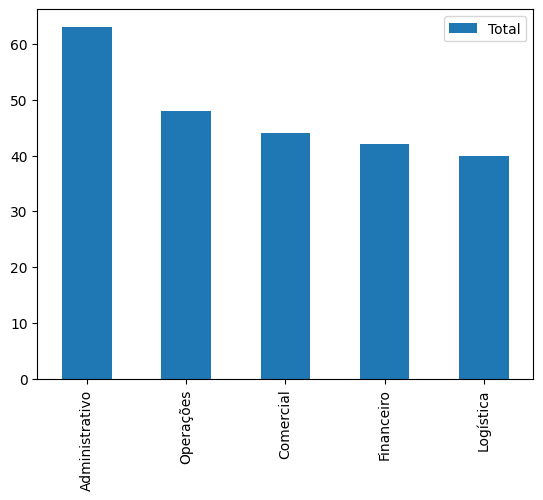

In [75]:
contratos_area = pd.DataFrame(tabela_servico_fatura["Area"].value_counts()).rename(columns={"Area":"Total"})
display(contratos_area)
contratos_area.plot(kind="bar")

#5. Calcule o total de funcionários por área

,Total
Administrativo,26
Comercial,26
Operações,23
Logística,21
Financeiro,18


<Axes: >

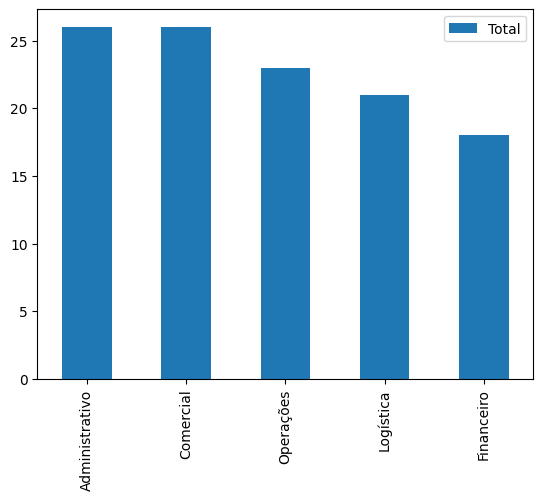

In [76]:
funcionarios_area = pd.DataFrame(funcionarios_df["Area"].value_counts()).rename(columns={"Area":"Total"})
display(funcionarios_area)
funcionarios_area.plot(kind="bar")

#6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?

In [77]:
ticket_medio_mensal = np.mean(tabela_servico_fatura["Total do Serviço"])
print(f"O ticket médio mensal da empresa é: {ticket_medio_mensal:,.2f}")

O ticket médio mensal da empresa é: 23,287.59
